In [65]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
import seaborn

# Feature engineering and data representation

The first component of feature engineering often simply defines a set of hand-crafted features on which we have direct domain knowledge.

In [67]:
from datasets import load_dataset
import matplotlib.pyplot as plt
dataset = load_dataset("mstz/adult", "income")["train"].to_pandas()

## Discretization

Discretization indicates the process of turning a countinuous variable into a discrete one. In data understanding, we have seen an hand-crafted process to do so, but we can leverage numerical methods to replace it. We are going to identify contingent subsets of values, and each set will be assigned a category.

|               | Bounds                                |
| ---------     | ------------------------------------- |
| Linear space  | Equi-spaced thresholds in the dataset |
| Quantiles     | Empyrical quantiles in the dataset    |
| Proximity     | Values are clustered                  |

In all cases, **we** decide how many categories to create.

[Reference](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html).

In [68]:
from sklearn.preprocessing import KBinsDiscretizer


discretizer = KBinsDiscretizer(
    n_bins=4,  # number of categories
    encode="ordinal",  # categories are assigned in increasing order of value
#     encode="onehot",  # categories are assigned in a one-hot vector
    strategy="uniform",  # uses linear space
    # strategy="quantiles",  # uses quantiles
#     strategy="kmeans",  # uses proximity
)
col = "capital_gain"
col_disc = "disc_"+col
dataset.loc[:, col_disc] = discretizer.fit_transform(dataset[[col]])
dataset = dataset.astype({col_disc: int})

print(f"Thresholds: {discretizer.bin_edges_}")
print(f"Number of extracted categories: {discretizer.n_bins_}")
dataset.head()

Thresholds: [array([    0.  , 24999.75, 49999.5 , 74999.25, 99999.  ])]
Number of extracted categories: [4]


,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,marital_status,native_country,occupation,race,relationship,is_male,workclass,over_threshold,disc_capital_gain
0,43,0.0,0.0,10,34278,35,Married-civ-spouse,United-States,Sales,White,Husband,True,Private,0,0
1,23,0.0,0.0,3,244698,35,Never-married,Mexico,Farming-fishing,White,Other-relative,True,Private,0,0
2,39,0.0,0.0,10,118286,40,Married-civ-spouse,United-States,Sales,Black,Husband,True,Private,0,0
3,35,0.0,0.0,9,126675,46,Divorced,?,Craft-repair,White,Not-in-family,True,Private,0,0
4,66,0.0,0.0,13,28367,99,Married-civ-spouse,United-States,Priv-house-serv,White,Other-relative,True,Private,0,0


In [69]:
dataset[col_disc].value_counts()

disc_capital_gain
0    36380
3      187
1       64
Name: count, dtype: int64

---

# Data representation

In [70]:
dataset.dtypes

age                        int64
capital_gain             float64
capital_loss             float64
education                   int8
final_weight               int64
hours_worked_per_week      int64
marital_status            object
native_country            object
occupation                object
race                      object
relationship              object
is_male                     bool
workclass                 object
over_threshold             int64
disc_capital_gain          int64
dtype: object

## Scaling and normalizing
We can represent data in several formats:

**Scaling**

A value $x$ is squashed into an $[a, b]$ interval through
$$
\begin{align}
size &= \max X - \min X & \\
\delta &= \dfrac{x - \min X}{size} & \\
x &= \delta size + \min X & \\
\end{align}
$$


**Standard scaling**

Centers data onto the origin, and scales it through
$$
x = \dfrac{x - \mu}{\sigma}.
$$


In [71]:
import math
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(dataset[["capital_gain"]])
dataset.loc[:, "scaled_capital_gain"] = scaler.transform(dataset[["capital_gain"]])

print(f"Scaling parametrization: {scaler.mean_, math.sqrt(scaler.var_)}")
dataset.head()

Scaling parametrization: (array([1091.7832437]), 7524.287534786524)


/var/folders/ls/l7bcv40n2pj5b7m77xskr0bh0000gn/T/ipykernel_88909/1810771289.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Scaling parametrization: {scaler.mean_, math.sqrt(scaler.var_)}")


,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,marital_status,native_country,occupation,race,relationship,is_male,workclass,over_threshold,disc_capital_gain,scaled_capital_gain
0,43,0.0,0.0,10,34278,35,Married-civ-spouse,United-States,Sales,White,Husband,True,Private,0,0,-0.145101
1,23,0.0,0.0,3,244698,35,Never-married,Mexico,Farming-fishing,White,Other-relative,True,Private,0,0,-0.145101
2,39,0.0,0.0,10,118286,40,Married-civ-spouse,United-States,Sales,Black,Husband,True,Private,0,0,-0.145101
3,35,0.0,0.0,9,126675,46,Divorced,?,Craft-repair,White,Not-in-family,True,Private,0,0,-0.145101
4,66,0.0,0.0,13,28367,99,Married-civ-spouse,United-States,Priv-house-serv,White,Other-relative,True,Private,0,0,-0.145101


In [77]:
dataset[["capital_gain"]]

,capital_gain
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
36626,0.0
36627,0.0
36628,0.0
36629,0.0


In [76]:
scaler.inverse_transform(dataset[['scaled_capital_gain']])

array([[   0.],
       [   0.],
       [   0.],
       ...,
       [   0.],
       [   0.],
       [4865.]])

## Encoding

- one-hot encoding: equalizes distance among categorical features
- target encoding: computes an empyrical conditioned probability on a label

### One-hot encoding
For a category $C$ with $\mid C \mid$ possible values, it creates a $\mid C \mid$-dimensional vector of $0$s, each dimension assigned to a category. If an instance belongs to the $i$-th category, then the $i$-th component of its vector is set to $1$.

|       | Red | Blue | Yellow |
| ----- | --- | ---- | ------ |
| Color | 0   | 0    | 0      |


Instances will then be encoded as follows

|       | Red | Blue | Yellow |
| ----- | --- | ---- | ------ |
| Color | $\langle 1, 0, 0\rangle$   | $\langle 0, 1, 0\rangle$    | $\langle 0, 0, 1\rangle$      |


In [22]:
dataset["marital_status"].unique()

array(['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated',
       'Married-spouse-absent', 'Widowed', 'Married-AF-spouse'],
      dtype=object)

In [45]:
from sklearn.preprocessing import OneHotEncoder
import pandas


encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(dataset[["marital_status"]])  # fit: extracts categories and assigns them to positions in the one-hot encoding schema
transformed_feature = encoder.transform(dataset[["marital_status"]]).astype(int)  # transform: map instances

# what category is assigned to each position?
pandas.DataFrame(transformed_feature, columns=encoder.get_feature_names_out())

,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed
0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
36626,1,0,0,0,0,0,0
36627,0,0,1,0,0,0,0
36628,0,0,1,0,0,0,0
36629,0,0,1,0,0,0,0


In [48]:
dataset.head()

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,marital_status,native_country,occupation,race,relationship,is_male,workclass,over_threshold
0,43,0.0,0.0,10,34278,35,Married-civ-spouse,United-States,Sales,White,Husband,True,Private,0
1,23,0.0,0.0,3,244698,35,Never-married,Mexico,Farming-fishing,White,Other-relative,True,Private,0
2,39,0.0,0.0,10,118286,40,Married-civ-spouse,United-States,Sales,Black,Husband,True,Private,0
3,35,0.0,0.0,9,126675,46,Divorced,?,Craft-repair,White,Not-in-family,True,Private,0
4,66,0.0,0.0,13,28367,99,Married-civ-spouse,United-States,Priv-house-serv,White,Other-relative,True,Private,0


### Target encoding

For a category $C$ with $\mid C \mid$ with domain $\{c_1, \dots, c_{\mid C \mid}\}$, and another category $L$ with domain $\{l_1, \dots, l_{\mid L \mid}\}$, it computes an empyrical distribution $\Pr(L \mid C)$, yielding a probability table $T$

| $\Pr(L \mid C)$   | $c_1$                           | $\dots$ | $c_{\mid C \mid}$               |
| ----------------- | ------------------------------- | ------- | ------------------------------- |
| $l_1$             | $\Pr(l_1 \mid c_1)$             | $\dots$ | $\Pr(l_1 \mid c_{\mid C \mid})$ |
| $\dots$           | $\dots$                         | $\dots$ | $\dots$ |
| $l_{\mid L \mid}$ | $\Pr(l_{\mid L \mid} \mid c_1)$ | $\dots$ | $\Pr(l_{\mid L \mid} \mid c_{\mid C \mid})$ |

An instance with category $l_i$ is then encoded with the $i$-th row of $T$.

In [23]:
from sklearn.preprocessing import TargetEncoder
import pandas


encoder = TargetEncoder()
encoder.fit(dataset[["marital_status"]], y=dataset["over_threshold"])  # fit: extracts categories and computes an empyrical conditioned probability
transformed_feature = encoder.transform(dataset[["marital_status"]])  # transform: map instances

# TargetEncoder creates one less column than necessary, since probabilities sum to 1
pandas.DataFrame(transformed_feature, columns=encoder.get_feature_names_out())

,marital_status
0,0.446234
1,0.046602
2,0.446234
3,0.100946
4,0.446234
...,...
36626,0.100946
36627,0.446234
36628,0.446234
36629,0.446234


## Principal Component Analysis
*[Reference](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#pca)*



In [51]:
from sklearn.decomposition import PCA
import numpy

dataset['over_threshold'] = dataset['over_threshold'].astype(bool)
# filter out categorical data
numeric_dataset = dataset.select_dtypes(include="number")

pca_instance = PCA()
pca_instance.fit(numeric_dataset.values)
pca_transformation = pca_instance.transform(numeric_dataset.values)

In [40]:
# variance per component
eigenvalues = pca_instance.explained_variance_
# variance per component, scaled to sum to 1
scaled_eigenvalues = pca_instance.explained_variance_ratio_
# eigenvectors, i.e., axes of reference
eigenvectors = pca_instance.components_


# norm of the whole transformation
transformation_norm_per_column = (pca_transformation ** 2).sum(axis=0)
cumulative_norm_per_reduction = numpy.cumsum(transformation_norm_per_column)

pca_dataframe = pandas.DataFrame.from_records(
    zip(
        eigenvalues,
        scaled_eigenvalues,
        cumulative_norm_per_reduction
    ),
    columns=["eigenvalues", "scaled_eigenvalues", "transformation_norm"]
)
pca_dataframe

,eigenvalues,scaled_eigenvalues,transformation_norm
0,1.120925e+10,9.949604e-01,4.105947e+14
1,5.661579e+07,5.025358e-03,4.126685e+14
2,1.598242e+05,1.418639e-05,4.126744e+14
3,1.889807e+02,1.677439e-08,4.126744e+14
4,1.490180e+02,1.322720e-08,4.126744e+14
5,6.323969e+00,5.613311e-10,4.126744e+14
6,1.414654e-01,1.255682e-11,4.126744e+14
7,3.945600e-03,3.502212e-13,4.126744e+14
8,3.272349e-14,2.904618e-24,4.126744e+14


### Scree plot: eigenvalues

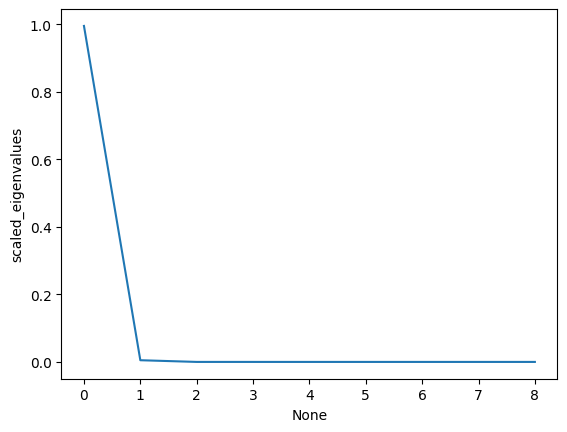

In [26]:
g = seaborn.lineplot(
    pca_dataframe,
    y="scaled_eigenvalues",
    x=pca_dataframe.index
)

### (Inverse) Scree plot: norm

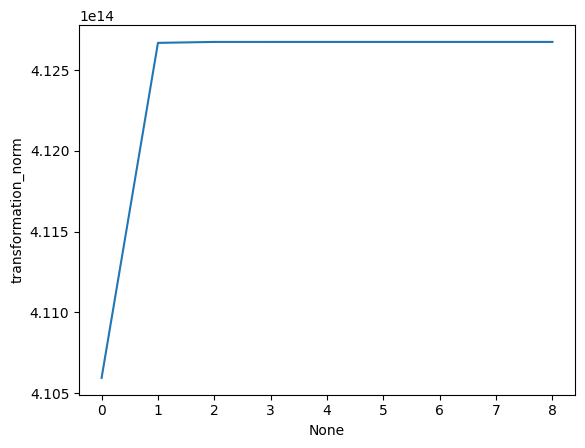

In [41]:
g = seaborn.lineplot(
    pca_dataframe,
    y="transformation_norm",
    x=pca_dataframe.index
)

## $t$-SNE

In [54]:
from sklearn.manifold import TSNE


# filter out categorical data
numeric_dataset = dataset.select_dtypes(include="number")

tsne = TSNE(
    n_components=2,
    init="random",  # one of "random", "pca" (runs t-SNE on a PCA mapping of the data)
    perplexity=25,  # the higher, the looser the clusters
    max_iter=250,  # maximum number of iterations
)
tsne_representation = tsne.fit_transform(numeric_dataset)

# optimization success
divergence = tsne.kl_divergence_

In [56]:
divergence

np.float64(1.7976931348623157e+308)

---

## Understanding representations

Representations (particularly $t$-SNE, which was developed with this goal in mind) can also give us a different view of the data.

In [61]:
tsne_dataframe = pandas.DataFrame(tsne_representation, columns=["tsne_x", "tsne_y"])
pca_dataframe = pandas.DataFrame(pca_transformation[:, :2], columns=["pca_x", "pca_y"])
original_and_transformed_dataframe = pandas.concat(
    [
        dataset,
        tsne_dataframe,
        pca_dataframe
    ],
    axis="columns"
)

<Axes: xlabel='pca_x', ylabel='pca_y'>

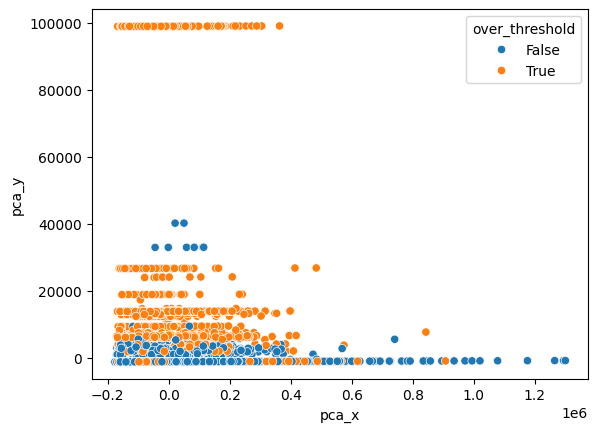

In [62]:
seaborn.scatterplot(
    original_and_transformed_dataframe,
    x="pca_x",
    y="pca_y",
    hue="over_threshold"
)

<Axes: xlabel='tsne_x', ylabel='tsne_y'>

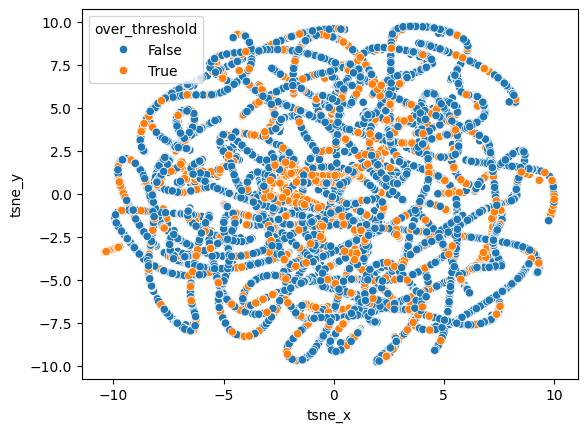

In [63]:
seaborn.scatterplot(
    original_and_transformed_dataframe,
    x="tsne_x",
    y="tsne_y",
    hue="over_threshold"
)